<a href="http://www.utt.fr"><img src="logo-UTT.svg" width="200" align="left"></a>
### Formation d'Ingénieur en Génie Mécanique
#### Eléments de bureau d'études (code UE TN12 niveau L3)
---

* Rapide tutoriel sur les [notebook et JupyterLab](https://github.com/PasLafon/UTT-Teaching/blob/master/Tuto-Perso-Jupyter/Tuto-Jupyter.md)
* Rapide tutoriel pour [télécharger ce notebook](https://github.com/PasLafon/UTT-Teaching/blob/master/Tuto-Perso-Jupyter/Tuto-nbviewer-GitHub.md) et le rendre actif (l'éxecuter, le modifier, ..) 

---

# Borne rétractable de parking 

Le dispositif à étudier permet d’interdire la circulation dans des zones à accès réservé. Le système doit être autonome (pas de nécessité de raccordement à une source d’énergie extérieure) et doit garantir un certain nombre de fonctionnement journalier.

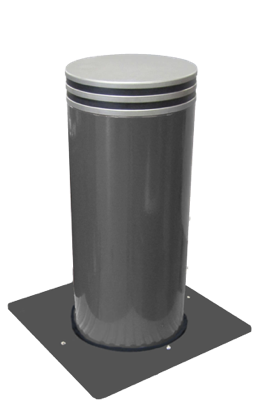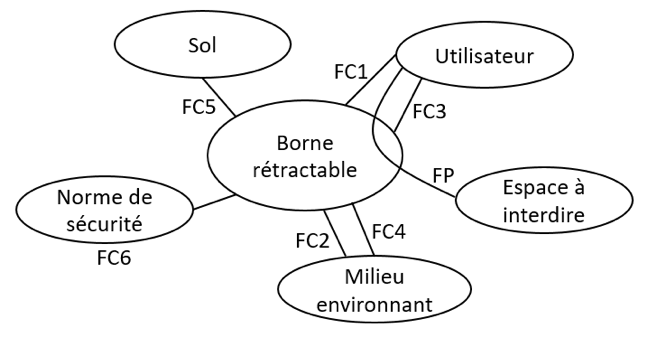

Liste des fonctions de service :
* FP : Permettre à l’utilisateur d’interdire ou d’autoriser un espace au véhicule de type automobile
* FC1 : Etre commandé à distance
* FC2 : Recevoir son énergie du milieu ambiant et la stocker
* FC3 : Permettre d’être actionné manuellement
* FC4 : Resister au agression du milieur extérieur
* FC5 : Etre mis en place dans le sol
* FC6 : Respecter les normes de sécurité électriue et mécanique

Critère de la fonction principale FP :
* Temps d’action (sortie ou rentrée de la borne) = 6s
* Course de la borne ( = hauteur sortie) = 500mm
* Poids maximum supportable par le plot lors de la montée = 80daN
* Autonomie = 50 cycles par jour

Critère de la fonction contrainte FC5 :
* Le système et la borne en position basse doivent être au ras du sol
* Dimension du caisson de la borne = 400mm x 400mm x 600mm de profondeur
* Dimension du caisson de commande = 400mm x 400mm x 300mm de profondeur


### 1/ Détailler les sous-fonctions de la fonction de service FC2 et donner différentes solutions techniques. Laquelle semble la plus intéressante ?

Sous fonction de FC2 :
* FC1 : récupérer/transformer l'énergie de l'environnement.
* FC2 : stocker l'énergie pour assurer l'autonomie nécessaire de la borne.

#### FC1 -> réponses possibles :

* Panneaux solaires photovoltaïque : énergie solaire -> énergie électrique.
* Panneaux solaires "thermiques" : énergie solaire -> énergie thermique (fluide caloporteur).
* Capteurs (matériaux) piézo-électriques : énergie mécanique -> énergie électrique.
* Eolien : 
    * énergie mécanique du vent -> énergie électrique, ou
    * énergie mécanique du vent utilisée directement (stockage ?)
* Energie thermique (effet "seebeck") -> énergie électrique

#### FC2 -> réponses possibles :

* Stockage d'énergie électrique :
    * dans une batterie
    * dans un super-condensateur
* Stockage d'énergie mécanique :
    * Volant d'inertie.
    * Energie de déformation élastique.
    * Lever une masse.
    * Pompage d'eau.
* Stockage d'énergie thermique (chauffer & isoler thermiquement le réservoir)

### 2/ Faire une estimation de la puissance mécanique nécessaire pour la sortie de la borne. 

1. En négligeant le poids de la borne et en ne considérant que la force maximale de levage (80daN) et une vitesse moyenne de sortie (500mm en 6s)

In [3]:
Fext = 800    # Force maximale de levage en [N]
Vmont = 0.5/6 # Vitesse de montée en [m/s]
Puis1 = Fext*Vmont
print('Puissance cas 1 [W] :%.2f'%(Puis1))

Puissance cas 1 [W] :66.67


2. En estimant le poids de la borne = cylindre creux aluminium dext = 200mm et dint = 150mm et longueur = 600mm + bouchon à l’extrémité disque plein de 150mm par 25mm d’épaisseur

In [32]:
# Dimension de la borne [m]
dext = 0.2   # Diam. ext.
dint = 0.15  # Diam. int.
lb   = 0.6     # Hauteur.
ep   = 0.025   # Epaisseur chapeau.
Vol  = 3.1415/4*((dext**2 -dint**2)*lb + dint**2*ep)
Mass = Vol*2700
print('Volume [dm^3] : % 8.2f'%(Vol*1e3))
print('Masse  [kg]   : % 8.2f'%(Mass))

Volume [dm^3] :     8.69
Masse  [kg]   :    23.46


Dans ce cas la puissance vaut (et elle est maximale) :

In [8]:
Puis2 = (Fext + Mass*9.81)*Vmont
print('Puissance cas 2 [W] :%.2f'%(Puis2))

Puissance cas 2 [W] :85.84


3. En ne considérant que le poids de la borne (majorité des cas de fonctionnement) :

In [33]:
Puis3 = (Mass*9.81)*Vmont
print('Puissance cas 3 [W] :%8.2f'%(Puis3))

Puissance cas 3 [W] :   19.18


### 3/ En négligeant la consommation d’énergie liée à la rentrée de la borne, faire une estimation de la quantité d’énergie maximale consommée par jour. 

In [35]:
t_cycle = 6  # Temps de cycle (montée) [s]
Pmin = min(Puis1,Puis2,Puis3)
Emin = Pmin*t_cycle
Pmax = max(Puis1,Puis2,Puis3)
Emax = Pmax*t_cycle
print('Emin [J] : %8.2f'%(Emin))
print('Emax [J] : %8.2f'%(Emax))
Ncycle = 50 # Nb cycles/jour
E_jour_min = Emin*Ncycle
E_jour_max = Emax*Ncycle
print('Emin jour [J] : %8.2f'%(E_jour_min))
print('Emax jour [J] : %8.2f'%(E_jour_max))

Emin [J] :   115.06
Emax [J] :   515.06
Emin jour [J] :  5753.12
Emax jour [J] : 25753.12


### 4/ En considérant un rendement global du système de conversion d’énergie et de transformation du mouvement (électrique -> sortie borne) de 30%, faire une estimation des caractéristiques nécessaires de la batterie (tension et capacité en A.h).

Données de batteries :

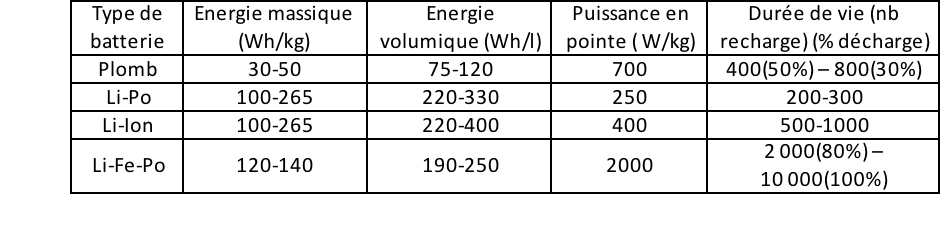

Pour une batterie au plomb de 12V (tension classique), utilisée à 30% de sa capacité pour maximiser la durée de vie, on a :

In [37]:
# Energie nécessaire pour la batterie
E_bat_min = E_jour_min/(0.3*0.3)
E_bat_max = E_jour_max/(0.3*0.3)
print('Emin batterie [J] : %10.2f'%(E_bat_min))
print('Emax batterie [J] : %10.2f'%(E_bat_max))

Emin batterie [J] :   63923.51
Emax batterie [J] :  286145.73


L'énergie électrique $\mathcal{E}_\text{Elec}$ s'écrit en fonction de $U$ la tension et $I$ l'intensité du courant pendant le temps $t$ en secondes :

$$\mathcal{E}_\text{Elec}=\mathcal{P}_\text{Elec}t=UIt$$

Si le temps est en heure :
$$\mathcal{E}_\text{Elec}=UIt3600$$

Donc la capacité d'une batterie $It$ en A.h vaut :
$$It=\dfrac{\mathcal{E}_\text{Elec}}{3600U}$$

In [40]:
Ubat = 12   # Tension aux bornes de la batterie
I_max = E_bat_max/(3600*Ubat)
I_min = E_bat_min/(3600*Ubat)
print('Capacité min [A.h] : %7.2f'%(I_min))
print('Capacité max [A.h] : %7.2f'%(I_max))

Capacité min [A.h] :    1.48
Capacité max [A.h] :    6.62


Estimation du poids de batterie nécessaire :

In [39]:
E_massique = 40                          # Energie massique moyenne d'une batterie au plomb [Wh/kg]
M_bat_max = (E_bat_max/3600)/E_massique  # /3600 pour passer des Joules au W.h
M_bat_min = (E_bat_min/3600)/E_massique 
print('Masse min [kg] : %8.2f'%(M_bat_min))
print('Masse max [kg] : %8.2f'%(M_bat_max))

Masse min [kg] :     0.44
Masse max [kg] :     1.99


On ne traite pas toutes les types de batteries, mais on peut voir que le plomb est bien adapté à la batterie de voiture thermique (fort appel de courant lors du démarrage du moteur). Hormis le poids/volume du plomb, c’est une techno intéressante par rapport Li-Po et Li-Ion pour des applications statiques. 
Batterie Li-Fe-Phosphate 12V 3,5Ah = 160€, même volume mais 1,1kg)


### 4/Détailler les sous-fonctions de la fonction de service FP et donner différentes solutions techniques.

* FP : Interdire l'accès d'un espace à un espace à un véhicule -> mouvement rectiligne de montée et de descente : Escamotage
    * FP1 : Fournir une énergie mécanique
    * FP2 : Transformer/adapter le mouvement
    * FP3 : Guider le mouvement
    * FP4 : Maintenir en position haute 

* FP1 : Fournir une énergie mécanique
    * Source électrique 
        * Moteur en rotation (courant continu, brushless …)
        * Moteur linéaire (type train magnétique mais existe sur les machines outils et chariot de positionnement)
        * Electroaimant
        * Conversion : électrique -> thermique ou pneumatique/hydraulique
    * Source thermique
        * Dilatation des matériaux solide ou liquide (exemple mini vérin blocage porte four de Pascal : courant électrique -> échauffement -> dilation -> sortie vérin sur 5 mm)
    * Source pneumatique
        * Pression x surface = force : vérin pneumatique / hydraulique

* FP2 : Transformer/adapter le mouvement
    * Mouvement entrée = rotation et mouvement sortie = rotation
        * Direct
        * Engrenage :
            * Axe parallèles : engrenages cylindriques à denture droite ou hélicoïdale (avantage bon rendement), 
            * Axe concourant : engrenage conique
            * Axe orthogonaux : roue et vis sans fin (avantage irréversible mais mauvais rendement)
        * 4 barres (essuie-glace)
        * Poulie-courroie ou chaine
     * Mouvement entrée = rotation et mouvement sortie = translation
        * Bielle manivelle (piston de voiture)
        * Came (soupape de voiture)
        * Pignon-crémaillère (droite ou conique suivant l’encombrement et le efforts)
        * Poulie courroie ou chaine courroie
        * Câble enroulé
    * Mouvement entrée = translation et mouvement sortie = rotation
        * Bielle manivelle
        * Pignon-crémaillère
        * 3 barres
    * Mouvement entrée = translation et mouvement sortie = translation
        * Direct
        * Bras de levier 

* FP3 : Guider le mouvement 
    * Mouvement de translation
        * Galets (métro aérien) 
        * Rail + galets (portail coulissant)
        * Coussinet
        * Cage à billes
        * Patin + rail de guidage
        * Contact direct (contact entre deux surfaces cylindriques ou deux surfaces planes)
    * Mouvement de rotation
        * Roulement (détailler des montages de rlts)
        * Coussinet
        * Contact direct
        * Galets (camion toupie, guidage arrière de la toupie)
* FP4 : Maintenir en position haute 
    * Bloquer le mouvement
        * Frein pneumatique/électromagnétique
        * Point d’indexage (mais prévoir un système de débrayage)
    * Mouvement irréversible
        * Roue et vis sans fin
        * Forte réduction + frottement
        * Géométrie de came
        * Position particulière du système bielle manivelle
    * Maintenir l’effort (consommation d’énergie)
